In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('ObesityDataSet.csv')

# EDA (Exploratory Data Analysis)

In [37]:
# menampilkan beberapa baris pertama
print("Head ObesityDataSet:")
display(df.head())

Head ObesityDataSet:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [38]:
df.info()
print(f'Jumlah baris: {df.shape[0]}, jumlah kolom: {df.shape[1]}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2103 non-null   object 
 7   NCP                             2099 non-null   object 
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2105 non-null   object 
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF                             21

In [39]:
# untuk deskripsi statistik fitur numerik
print("Deskripsi Statistik Fitur Numerik:")
display(df.describe())

Deskripsi Statistik Fitur Numerik:


,Age,Height,Weight
count,2089.000000,2089.000000,2092.000000
mean,24.717928,1.706623,88.608184
std,8.391323,0.117700,36.154617
min,14.000000,1.450000,39.000000
25%,19.955257,1.630000,66.000000
50%,22.814657,1.701284,83.000000
75%,26.000000,1.770000,108.055736
max,106.441252,2.853986,441.131078


In [40]:
# untuk mengecek missing values
print("Missing Values per Kolom:")
display(df.isnull().sum().to_frame('missing_count'))

Missing Values per Kolom:


,missing_count
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [41]:
# untuk mengecek nilai unik per kolom
print("Unique Values per Kolom:")
display(df.nunique().to_frame('unique_count'))

Unique Values per Kolom:


,unique_count
Age,1393
Gender,3
Height,1561
Weight,1517
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [42]:
# untuk mengecek duplikasi
dup_count = df.duplicated().sum()
print(f'Jumlah baris duplikat: {dup_count}')

Jumlah baris duplikat: 18


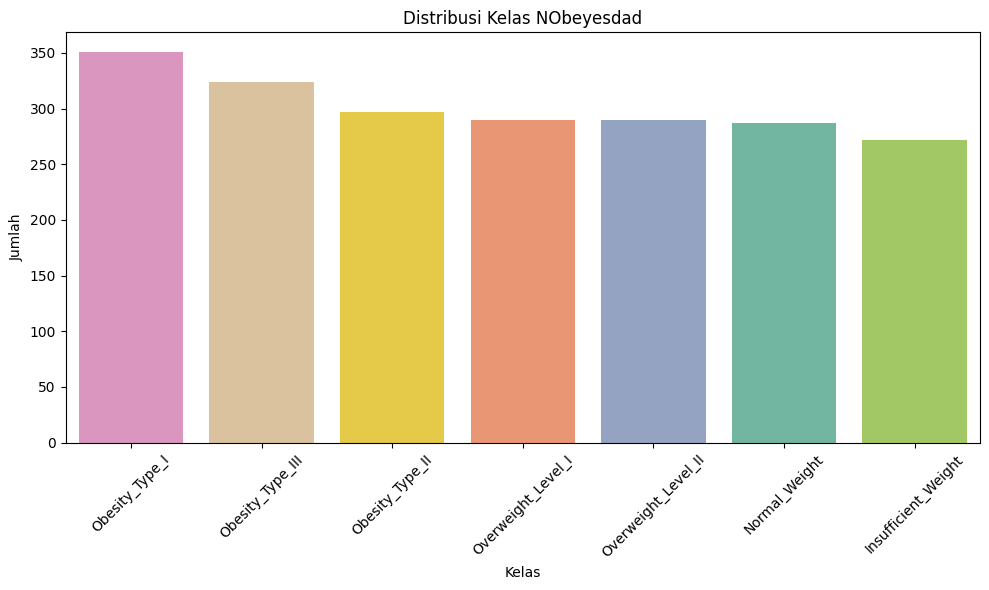

In [43]:
# untuk melihat keseimbangan/distribusi kelas target
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='NObeyesdad', hue='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='Set2', legend=False)
plt.xticks(rotation=45)
plt.title('Distribusi Kelas NObeyesdad')
plt.xlabel('Kelas')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

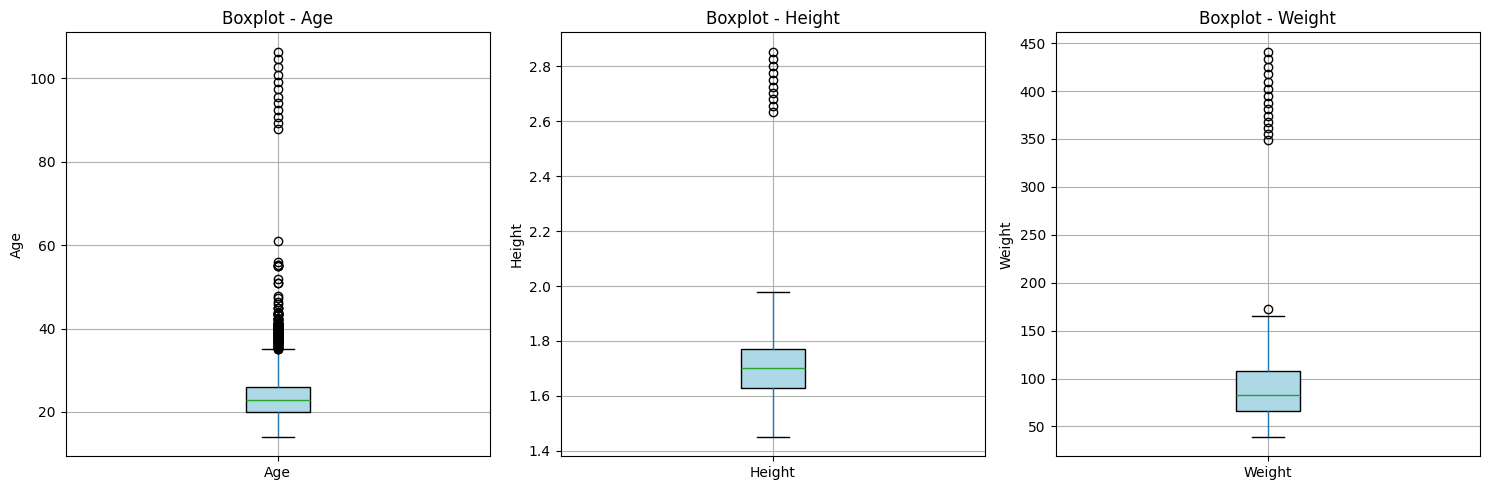

In [44]:
# Visualisasi boxplot kolom numerik untuk mendeteksi outlier
# Ambil semua kolom numerik
num_cols = df.select_dtypes(include='number').columns.tolist()

# Konversi ke numeric untuk berjaga-jaga
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

# Hitung layout yang cocok untuk subplot (misal 3 kolom per baris)
n = len(num_cols)
cols = 3
rows = (n + cols - 1) // cols  # ceiling division

# Buat figure
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 5*rows))

# Flatten axes agar bisa diiterasi
axes = axes.flatten()

# Plot boxplot untuk setiap kolom numerik
for i, col in enumerate(num_cols):
    df.boxplot(column=col, ax=axes[i], patch_artist=True,
               boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'Boxplot - {col}')
    axes[i].set_ylabel(col)

# Matikan axis kosong jika kolom tidak genap
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Kesimpulan EDA**

*   Dataset ObesityDataSet.csv memiliki 2111 baris dan 17 kolom.
*   Dari total 17 kolom, 14 kolom bertipe object, dan sisanya numerik.
*   Ditemukan missing values, unique values dan data duplikat yang perlu ditangani.
*   Distribusi kelas target NObeyesdad tampak tidak seimbang.
*   Terdapat outlier pada kolom numerik.










